In [1]:
# max density: 0.5472±0.002


import math
import random
#Benötigte Pakete

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Circle 
from scipy import stats
from decimal import Decimal

import matplotlib.mlab as mlab
import numpy as np
import cmath

from numpy import linalg as LA
import scipy
from scipy import spatial
import time
#import tables

import os
#import h5py

from matplotlib import animation
import matplotlib
from scipy.optimize import curve_fit
from matplotlib import rc

import gc
import sys
gc.enable()
import copy

from mpl_toolkits import mplot3d

In [2]:
import os
import numpy as np
import time
import scipy
a=np.zeros(5)

In [3]:
def to_ind(coord):
    x_shifted = coord[0]+radius
    y_shifted = np.abs(coord[1]-radius)

    j = np.floor(x_shifted/(size_square))
    i = np.floor(y_shifted/(size_square))
    return int(i),int(j)

def to_coord(ind):
    x = ind[1]*size_square
    y = ind[0]*size_square
    
    x_shifted = x -radius
    y_shifted = radius - y
 
    return [x_shifted, y_shifted]


def get_atoms_near(punkt, counting_atoms):
    m,n = to_ind(punkt[0])
    atoms_near=[]
    atoms_near.extend(counting_atoms[m][n][1])

    try:
        atoms_near.extend(counting_atoms[m+1][n][1])             
        atoms_near.extend(counting_atoms[m+1][n+1][1])       
        atoms_near.extend(counting_atoms[m][n+1][1])
        atoms_near.extend(counting_atoms[m-1][n-1][1])        
        atoms_near.extend(counting_atoms[m-1][n][1])
        atoms_near.extend(counting_atoms[m-1][n+1][1])
        atoms_near.extend(counting_atoms[m][n-1][1])
        atoms_near.extend(counting_atoms[m+1][n-1][1])
        return atoms_near
    except IndexError:
        if m+1<number_squares:
            atoms_near.extend(counting_atoms[m+1][n][1])
            if n+1< number_squares:
                atoms_near.extend(counting_atoms[m+1][n+1][1])
        if n+1<number_squares:
            atoms_near.extend(counting_atoms[m][n+1][1])

        if (m-1)>=0 and (n-1)>=0: 
            atoms_near.extend(counting_atoms[m-1][n-1][1])
        if (m-1)>=0: 
            atoms_near.extend(counting_atoms[m-1][n][1])
            if n+1<number_squares:
                atoms_near.extend(counting_atoms[m-1][n+1][1])
        if (n-1)>=0: 
            atoms_near.extend(counting_atoms[m][n-1][1])
            if m+1<number_squares:
                atoms_near.extend(counting_atoms[m+1][n-1][1])
    return atoms_near


#produce atoms ohne Vorschlagen bei letzten Atomen wohin es plaziert werden soll

def produce_atoms(number_atoms, a, r_b):
    global size_square
    global number_squares
    size_square = 2*r_b #np.sqrt(density*50*r_b**2)   #2*r_b   #wähle size_square so, dass 50 atome drin sind.
    #size_square gerade klein genug um 8 Felder außen rum zu benutzen um abzugleichen
    number_squares= int(a*2/size_square)
    size_square = a*2/number_squares
    
    A=np.pi*a*a

    counting_atoms = [[[0,[]] for i in range(number_squares)] for i in range(number_squares)]
        
    atoms = [[0,0]]
    m,n = to_ind([0,0])
    counting_atoms[m][n][0]+=1
    counting_atoms[m][n][1] = [[0,0]]
    
    #start=time.time()
    for i in range(number_atoms-len(atoms)):
        r=(a-r_b)*np.sqrt(random.uniform(0,1))
        theta=random.uniform(0,1)*2*np.pi
        x,y=r * np.cos(theta), r * np.sin(theta)
        punkt = np.array([[x,y]]) 
        gesetzt= False
        
        while (gesetzt==False):
            gesetzt=True

            atoms_near = get_atoms_near(punkt, counting_atoms)

            if atoms_near:
                if ((np.min(scipy.spatial.distance.cdist(atoms_near, punkt, metric='euclidean')))<(2*r_b)):
                    r=a*np.sqrt(random.uniform(0,1))
                    theta=random.uniform(0,1)*2*np.pi
                    x,y=r * np.cos(theta), r * np.sin(theta)
                    punkt = np.array([[x,y]]) 
                    gesetzt=False
                            
                    
        atoms.append(punkt[0])
        m,n = to_ind(punkt[0])
        counting_atoms[m][n][0]+=1
        counting_atoms[m][n][1].append(punkt[0].tolist())

    return np.round(atoms,4)

# Um Configurations zu erzeugen und speichern

#### Einzeln erzeugen

In [ ]:
start=time.time()
number_atoms = 1000
density= 0.5
r_b = 5
radius = (np.sqrt(number_atoms*r_b**2/density))

for save_nr in range(0,1):
    print(save_nr)
    folder_a= "/home/jp/Dokumente/Bachelorarbeit/Überarbeitung/configurations/density_"+str(np.round(density,3))+"/atoms_"+str(number_atoms)
    atoms = open(folder_a+"/atoms"+"_"+str(save_nr)+".npy","wb")
    atoms_array = produce_atoms(number_atoms, radius, r_b)
    np.save(atoms,atoms_array)
    atoms.close()
print(time.time()-start)

In [10]:
start=time.time()
number_atoms = 15000
density= 0.45
r_b = 5
radius = (np.sqrt(number_atoms*r_b**2/density))
atoms_array = produce_atoms(number_atoms, radius, r_b)
print(time.time()-start)

14.139646053314209


### Mehrere auf einmal

In [28]:
r_b=5

anzahl=np.array([2500,5000,7500,10000,12500,15000])
iteration=np.array([100,80,50,30,20,10])

anzahl=np.array([10000,12500,15000])
iteration=np.array([2,2,10])

anzahl=np.array([10000])
iteration=np.array([2])

density=0.54

##### Ordner erstellen

In [29]:
speicher_atome=np.zeros(len(anzahl),int)

s=0
for number_atoms in anzahl:
    radius = (np.sqrt(number_atoms*r_b**2/density))
    folder_a= "/pfs/data2/home/hd/hd_hd/hd_wo455/Configurations/density_"+str(np.round(density,3))+"/atoms_"+str(number_atoms)
   
    if number_atoms>1000:
        if not os.path.exists(folder_a):
            os.makedirs(folder_a)
            print(folder_a +" erstellt")

        path, dirs, files = next(os.walk(folder_a))
        speicher_atome[s] = len(files)
    
    print("# files in Ordner atom_"+str(number_atoms)+": ", speicher_atome[s])
    s+=1

    
print("Anzahl:          ",anzahl)
print("speicher_atome:  ",speicher_atome)
print("Radius:          ",np.sqrt((anzahl*r_b**2)/(density)))

# files in Ordner atom_10000:  0
Anzahl:           [10000]
speicher_atome:   [0]
Radius:           [ 680.41381744]


##### Erzeugen

In [30]:
start=time.time()

z=0
ttt= np.zeros(len(anzahl[anzahl>500]))
for number_atoms in anzahl[anzahl>500]: 
    print("Atome: ", number_atoms)
    start2=time.time()
    for save_nr in range(speicher_atome[anzahl>500][z],iteration[anzahl>500][z]):
        print(save_nr)
        radius = (np.sqrt(number_atoms*r_b**2/density))
        atoms_array = produce_atoms(number_atoms, radius, r_b)
        folder_a= "/pfs/data2/home/hd/hd_hd/hd_wo455/Configurations/density_"+str(np.round(density,3))+"/atoms_"+str(number_atoms)
        atoms = open(folder_a+"/atoms"+"_"+str(save_nr)+".npy","wb")
        np.save(atoms,atoms_array)
        atoms.close()
    
    timo = time.time()-start2
    print("time: ",  timo)
    ttt[z] = timo
    z+=1
    
print(time.time()-start)

Atome:  10000
0
1
time:  1260.7350368499756
1260.736529827118


#### Testen ob alle files erreichbar sind, wenn nicht erzeugen

In [73]:
k=0
for number_atoms in anzahl:
    radius = (np.sqrt(number_atoms*r_b**2/density))
    folder_a= "/home/jp/Dokumente/Bachelorarbeit/Überarbeitung/configurations/density_"+str(np.round(density,3))+"/atoms_"+str(number_atoms)
    for save_nr in range(0,int(speicher_atome[k])):
        atoms = open(folder_a+"/atoms"+"_"+str(save_nr)+".npy","rb")
        a=np.load(atoms)
        atoms.close()

    k+=1

In [7]:
save_nr=0
number_atoms=12500
radius = (np.sqrt(number_atoms*r_b**2/density))
folder_a= "/pfs/data2/home/hd/hd_hd/hd_wo455/Configurations/density_"+str(np.round(density,3))+"/atoms_"+str(number_atoms)
atoms = open(folder_a+"/atoms"+"_"+str(save_nr)+".npy","wb")
%time atoms_array = produce_atoms(number_atoms, radius, r_b)
np.save(atoms,atoms_array)

NameError: name 'produce_atoms' is not defined

NameError: name 'atoms_array' is not defined

#### Testen, ob Radius, Anzahl und r_b passt

In [32]:
save_nr=1
number_atoms=10000
folder_a= "/pfs/data2/home/hd/hd_hd/hd_wo455/Configurations/density_"+str(np.round(density,3))+"/atoms_"+str(number_atoms)
data = open(folder_a+"/atoms"+"_"+str(save_nr)+".npy","rb")
a=np.load(data)


n=len(a)
r=np.max(scipy.spatial.distance.cdist(a, [[0,0]], metric='euclidean'))
rr_b =np.min(scipy.spatial.distance.cdist(a, a, metric='euclidean')[scipy.spatial.distance.cdist(a, a, metric='euclidean')>0])
print("Number_atoms: ",n)
print("radius: ",r)
print("r_b ", rr_b)
print("Dichte: ", n*(rr_b/2)**2/r**2)

Number_atoms:  10000
radius:  680.411307297
r_b  9.999995936
Dichte:  0.54000354538


# Neuer Algorithmus

### Zeit testen

In [24]:
number_atoms=5000
r_b=5
density=0.54
radius = (np.sqrt(number_atoms*r_b**2/density))

size_square = 2*r_b #np.sqrt(density*50*r_b**2)   #2*r_b   #wähle size_square so, dass 50 atome drin sind.
#size_square gerade klein genug um 8 Felder außen rum zu benutzen um abzugleichen
number_squares= int(radius*2/size_square)
size_square = radius*2/number_squares
print(size_square)


%time atoms_array, counting_atoms=produce_atoms(number_atoms,radius,r_b)

dist= scipy.spatial.distance.cdist(atoms_array, atoms_array, metric='euclidean')
print(np.min(dist[dist>0]))

10.023442173431002


KeyboardInterrupt: 

2.8284271247461903


### Test for random arrangement, nachzählen der Atome

CPU times: user 3.38 ms, sys: 0 ns, total: 3.38 ms
Wall time: 3.27 ms


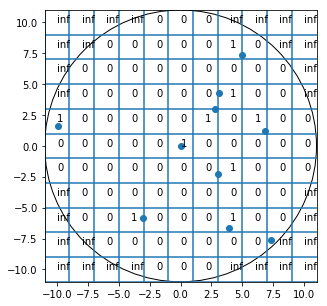

In [16]:
radius = 11
r_b=0
number_squares=11
size_square = radius*2/number_squares

%time atoms_array, counting_atoms=produce_atoms(10,radius,r_b)

fig, ax = plt.subplots(1,1, figsize=(7,5))
ax.scatter(atoms_array[:,0],atoms_array[:,1])
ax.set_xlim(-radius,radius)
ax.set_ylim(-radius,radius)

ax.set_aspect('equal')


for i in np.arange(-radius,radius,size_square):
    ax.axvline(i)
    ax.axhline(i)

for j,x in enumerate(np.arange(-radius+size_square/2,radius, size_square)):
    for i,y in enumerate(-np.arange(-radius+size_square/2,radius, size_square)):
        ax.text(x,y,counting_atoms[i][j][0])

for i in range(len(atoms_array)):
    circle = plt.Circle((atoms_array[i][0], atoms_array[i][1]), radius=r_b, fill=False,color="orange")
    plt.gca().add_patch(circle)

    
circle = plt.Circle((0, 0), radius=radius, fill=False)
plt.gca().add_patch(circle)
#print(counting_atoms[0][2][1])

### Testen, ob der Vorschlage Algorithmus funktioniert

Gitter mit Atomen, wo ein Atom rausgenommen wurde. Algorithmus soll vorschlagen, dort den Punkt zu platzieren


[-6.0, 6.0]
[-5.4834218   4.94010443]


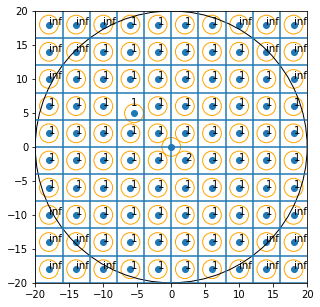

In [23]:
radius = 20

number_squares=10
size_square = radius*2/number_squares
r_b=size_square/2.9    
    
a=radius

counting_atoms = [[[0,[]] for i in range(number_squares)] for i in range(number_squares)]
for i in range(int(number_squares/2)+1):
    j=0
    while j<=number_squares/2 -i:

        if np.linalg.norm(to_coord([i,j]))>(radius+np.sqrt(2)*size_square/3):
            counting_atoms[i][j][0]=np.inf
            counting_atoms[int(number_squares)-1-i][j][0]=np.inf
            counting_atoms[i][int(number_squares)-1-j][0]=np.inf
            counting_atoms[int(number_squares)-1-i][int(number_squares)-1-j][0]=np.inf
        j+=1
            
atoms_array=[[0,0]]    
m,n = to_ind([0,0])
counting_atoms[m][n][0]+=1
counting_atoms[m][n][1] = [[0,0]]


for j,x in enumerate(np.arange(-radius+size_square/2,radius, size_square)):
    for i,y in enumerate(-np.arange(-radius+size_square/2,radius, size_square)):
        atoms_array.append([x,y])
        m,n = to_ind([x,y])
        counting_atoms[m][n][0]+=1
        counting_atoms[m][n][1].append([x,y])
        
#rint(atoms_array[34])
i,j=to_ind(atoms_array[34])
counting_atoms[i][j][0]=0
atoms_array.remove(atoms_array[34])
print(counting_atoms[i][j][1][0])
counting_atoms[i][j][1]=[]
     
    

count_while=876
r=(a-r_b)*np.sqrt(random.uniform(0,1))
theta=random.uniform(0,1)*2*np.pi
x,y=r* np.cos(theta), r * np.sin(theta)
punkt = np.array([[x,y]]) 

gesetzt= False
while (gesetzt==False):
    count_while+=1
    gesetzt=True
 
    atoms_near = get_atoms_near(punkt, counting_atoms)

    if atoms_near:
        if ((np.min(scipy.spatial.distance.cdist(atoms_near, punkt, metric='euclidean')))<(2*r_b)):
            gesetzt=False
    
    k=0
    if count_while>0:
        while (gesetzt==False):
            gesetzt=True
            k+=1
            ind = np.argmin(np.array(counting_atoms)[:,:,0])
            m = ind//number_squares
            n = ind%number_squares

            x_grid,y_grid= to_coord([m,n])
      
            x = x_grid + 1*size_square*random.uniform(0,1)   
            y = y_grid - 1*size_square*random.uniform(0,1) 
        
            while np.linalg.norm([x,y])>radius:
                x = x_grid + 1*size_square*random.uniform(0,1)   
                y = y_grid - 1*size_square*random.uniform(0,1)         

            punkt = np.array([[x,y]]) 
            atoms_near = get_atoms_near(punkt, counting_atoms)

            if atoms_near:
                if ((np.min(scipy.spatial.distance.cdist(atoms_near, punkt, metric='euclidean')))<(2*r_b)):
                    gesetzt=False

        

atoms_array.append(punkt[0])
print(punkt[0])
m,n = to_ind(punkt[0])
counting_atoms[m][n][0]+=1
counting_atoms[m][n][1].append(punkt[0].tolist())


    
atoms_array=np.array(atoms_array)
fig, ax = plt.subplots(1,1, figsize=(7,5))
ax.scatter(atoms_array[:,0],atoms_array[:,1])
ax.set_xlim(-radius,radius)
ax.set_ylim(-radius,radius)

ax.set_aspect('equal')


for i in np.arange(-radius,radius,size_square):
    ax.axvline(i)
    ax.axhline(i)

for j,x in enumerate(np.arange(-radius+size_square/2,radius, size_square)):
    for i,y in enumerate(-np.arange(-radius+size_square/2,radius, size_square)):
        ax.text(x,y,counting_atoms[i][j][0])

for i in range(len(atoms_array)):
    circle = plt.Circle((atoms_array[i][0], atoms_array[i][1]), radius=r_b, fill=False,color="orange")
    plt.gca().add_patch(circle)

    
circle = plt.Circle((0, 0), radius=radius, fill=False)
plt.gca().add_patch(circle)
#print(counting_atoms[0][2][1])


In [45]:
def to_ind(coord):
    x_shifted = coord[0]+radius
    y_shifted = np.abs(coord[1]-radius)

    j = np.floor(x_shifted/(size_square))
    i = np.floor(y_shifted/(size_square))
    return int(i),int(j)

def to_coord(ind):
    x = ind[1]*size_square
    y = ind[0]*size_square
    
    x_shifted = x -radius
    y_shifted = radius - y
 
    return [x_shifted, y_shifted]


def get_atoms_near(punkt, counting_atoms):
    m,n = to_ind(punkt[0])
    atoms_near=[]
    atoms_near.extend(counting_atoms[m][n][1])

    try:
        atoms_near.extend(counting_atoms[m+1][n][1])             
        atoms_near.extend(counting_atoms[m+1][n+1][1])       
        atoms_near.extend(counting_atoms[m][n+1][1])
        atoms_near.extend(counting_atoms[m-1][n-1][1])        
        atoms_near.extend(counting_atoms[m-1][n][1])
        atoms_near.extend(counting_atoms[m-1][n+1][1])
        atoms_near.extend(counting_atoms[m][n-1][1])
        atoms_near.extend(counting_atoms[m+1][n-1][1])
        return atoms_near
    except IndexError:
        if m+1<number_squares:
            atoms_near.extend(counting_atoms[m+1][n][1])
            if n+1< number_squares:
                atoms_near.extend(counting_atoms[m+1][n+1][1])
        if n+1<number_squares:
            atoms_near.extend(counting_atoms[m][n+1][1])

        if (m-1)>=0 and (n-1)>=0: 
            atoms_near.extend(counting_atoms[m-1][n-1][1])
        if (m-1)>=0: 
            atoms_near.extend(counting_atoms[m-1][n][1])
            if n+1<number_squares:
                atoms_near.extend(counting_atoms[m-1][n+1][1])
        if (n-1)>=0: 
            atoms_near.extend(counting_atoms[m][n-1][1])
            if m+1<number_squares:
                atoms_near.extend(counting_atoms[m+1][n-1][1])
    return atoms_near


#produce atoms mit Vorschlagen bei letzten Atomen wohin es plaziert werden soll
def produce_atoms(number_atoms, a, r_b):
    global size_square
    global number_squares
    size_square = 2*r_b #np.sqrt(density*50*r_b**2)   #2*r_b   #wähle size_square so, dass 50 atome drin sind.
    #size_square gerade klein genug um 8 Felder außen rum zu benutzen um abzugleichen
    number_squares= int(a*2/size_square)
    size_square = a*2/number_squares
    
    A=np.pi*a*a
        
    counting_atoms = [[[0,[]] for i in range(number_squares)] for i in range(number_squares)]
    for i in range(int(number_squares/2)+1):
        j=0
        while j<=number_squares/2 -i:
    
            if np.linalg.norm(to_coord([i,j]))>(radius+np.sqrt(2)*size_square/3):
                counting_atoms[i][j][0]=np.inf
                counting_atoms[int(number_squares)-1-i][j][0]=np.inf
                counting_atoms[i][int(number_squares)-1-j][0]=np.inf
                counting_atoms[int(number_squares)-1-i][int(number_squares)-1-j][0]=np.inf
            j+=1
        
    atoms = [[0,0]]
    m,n = to_ind([0,0])
    counting_atoms[m][n][0]+=1
    counting_atoms[m][n][1] = [[0,0]]
    
        
    for i in range(number_atoms-len(atoms)):
        r=(a-r_b)*np.sqrt(random.uniform(0,1))
        theta=random.uniform(0,1)*2*np.pi
        x,y=r * np.cos(theta), r * np.sin(theta)
        punkt = np.array([[x,y]]) 
        gesetzt= False
        
        while (gesetzt==False):
            gesetzt=True

            atoms_near = get_atoms_near(punkt, counting_atoms)

            if atoms_near:
                if ((np.min(scipy.spatial.distance.cdist(atoms_near, punkt, metric='euclidean')))<(2*r_b)):
                    r=a*np.sqrt(random.uniform(0,1))
                    theta=random.uniform(0,1)*2*np.pi
                    x,y=r * np.cos(theta), r * np.sin(theta)
                    punkt = np.array([[x,y]]) 
                    gesetzt=False

            
            if i>0.95*number_atoms:  
                k=0
                while (gesetzt==False):
                    k+=1
                    
                    gesetzt=True
                    
                    ind = np.argmin(np.array(counting_atoms)[:,:,0])
                    m = ind//number_squares
                    n = ind%number_squares
               
                    if k<100:
                        x_grid,y_grid= to_coord([m,n])
                        x = x_grid + 1.5*size_square*random.uniform(0,1)   
                        y = y_grid - 1.5*size_square*random.uniform(0,1) 
                        
                        while (np.linalg.norm([x,y])>radius):
                            x = x_grid + 1.5*size_square*random.uniform(0,1)   
                            y = y_grid - 1.5*size_square*random.uniform(0,1)   
                    else:
                        counting_atoms[m][n][0]=np.inf
                        k=0
                    
                    punkt = np.array([[x,y]]) 
                    atoms_near = get_atoms_near(punkt, counting_atoms)
                    if atoms_near:
                        if ((np.min(scipy.spatial.distance.cdist(atoms_near, punkt, metric='euclidean')))<(2*r_b)):
                            gesetzt=False
                            
                    
        atoms.append(punkt[0])
        m,n = to_ind(punkt[0])
        counting_atoms[m][n][0]+=1
        counting_atoms[m][n][1].append(punkt[0].tolist())

    return np.round(atoms,4), counting_atoms


#produce atoms ohne Vorschlagen bei letzten Atomen wohin es plaziert werden soll

def produce_atoms(number_atoms, a, r_b):
    A=np.pi*a*a
    
    
    counting_atoms = [[[0,[]] for i in range(number_squares)] for i in range(number_squares)]
        
    atoms = [[0,0]]
    m,n = to_ind([0,0])
    counting_atoms[m][n][0]+=1
    counting_atoms[m][n][1] = [[0,0]]
    
        
    for i in range(number_atoms-len(atoms)):
        r=(a-r_b)*np.sqrt(random.uniform(0,1))
        theta=random.uniform(0,1)*2*np.pi
        x,y=r * np.cos(theta), r * np.sin(theta)
        punkt = np.array([[x,y]]) 
        gesetzt= False
        
        while (gesetzt==False):
            gesetzt=True

            atoms_near = get_atoms_near(punkt, counting_atoms)

            if atoms_near:
                if ((np.min(scipy.spatial.distance.cdist(atoms_near, punkt, metric='euclidean')))<(2*r_b)):
                    r=a*np.sqrt(random.uniform(0,1))
                    theta=random.uniform(0,1)*2*np.pi
                    x,y=r * np.cos(theta), r * np.sin(theta)
                    punkt = np.array([[x,y]]) 
                    gesetzt=False
                            
                    
        atoms.append(punkt[0])
        m,n = to_ind(punkt[0])
        counting_atoms[m][n][0]+=1
        counting_atoms[m][n][1].append(punkt[0].tolist())

    return np.round(atoms,4), counting_atoms




# Code for Poisson Disk

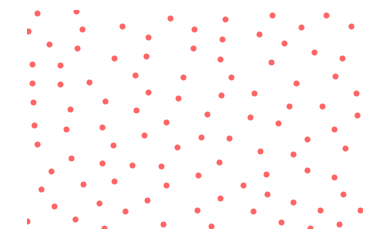

In [5]:
# Choose up to k points around each reference point as candidates for a new
# sample point
k = 30

# Minimum distance between samples
r = 5

width, height = 60, 60

# Cell side length
a = r/np.sqrt(2)
# Number of cells in the x- and y-directions of the grid
nx, ny = int(width / a) + 1, int(height / a) + 1

# A list of coordinates in the grid of cells
coords_list = [(ix, iy) for ix in range(nx) for iy in range(ny)]
# Initilalize the dictionary of cells: each key is a cell's coordinates, the
# corresponding value is the index of that cell's point's coordinates in the
# samples list (or None if the cell is empty).
cells = {coords: None for coords in coords_list}

def get_cell_coords(pt):
    """Get the coordinates of the cell that pt = (x,y) falls in."""

    return int(pt[0] // a), int(pt[1] // a)

def get_neighbours(coords):
    """Return the indexes of points in cells neighbouring cell at coords.

    For the cell at coords = (x,y), return the indexes of points in the cells
    with neighbouring coordinates illustrated below: ie those cells that could 
    contain points closer than r.

                                     ooo
                                    ooooo
                                    ooXoo
                                    ooooo
                                     ooo

    """

    dxdy = [(-1,-2),(0,-2),(1,-2),(-2,-1),(-1,-1),(0,-1),(1,-1),(2,-1),
            (-2,0),(-1,0),(1,0),(2,0),(-2,1),(-1,1),(0,1),(1,1),(2,1),
            (-1,2),(0,2),(1,2),(0,0)]
    neighbours = []
    for dx, dy in dxdy:
        neighbour_coords = coords[0] + dx, coords[1] + dy
        if not (0 <= neighbour_coords[0] < nx and
                0 <= neighbour_coords[1] < ny):
            # We're off the grid: no neighbours here.
            continue
        neighbour_cell = cells[neighbour_coords]
        if neighbour_cell is not None:
            # This cell is occupied: store this index of the contained point.
            neighbours.append(neighbour_cell)
    return neighbours

def point_valid(pt):
    """Is pt a valid point to emit as a sample?

    It must be no closer than r from any other point: check the cells in its
    immediate neighbourhood.

    """

    cell_coords = get_cell_coords(pt)
    for idx in get_neighbours(cell_coords):
        nearby_pt = samples[idx]
        # Squared distance between or candidate point, pt, and this nearby_pt.
        distance2 = (nearby_pt[0]-pt[0])**2 + (nearby_pt[1]-pt[1])**2
        if distance2 < r**2:
            # The points are too close, so pt is not a candidate.
            return False
    # All points tested: if we're here, pt is valid
    return True

def get_point(k, refpt):
    """Try to find a candidate point relative to refpt to emit in the sample.

    We draw up to k points from the annulus of inner radius r, outer radius 2r
    around the reference point, refpt. If none of them are suitable (because
    they're too close to existing points in the sample), return False.
    Otherwise, return the pt.

    """
    i = 0
    while i < k:
        rho, theta = np.random.uniform(r, 2*r), np.random.uniform(0, 2*np.pi)
        pt = refpt[0] + rho*np.cos(theta), refpt[1] + rho*np.sin(theta)
        if not (0 <= pt[0] < width and 0 <= pt[1] < height):
            # This point falls outside the domain, so try again.
            continue
        if point_valid(pt):
            return pt
        i += 1
    # We failed to find a suitable point in the vicinity of refpt.
    return False

# Pick a random point to start with.
pt = (np.random.uniform(0, width), np.random.uniform(0, height))
samples = [pt]
# Our first sample is indexed at 0 in the samples list...
cells[get_cell_coords(pt)] = 0
# ... and it is active, in the sense that we're going to look for more points
# in its neighbourhood.
active = [0]

nsamples = 1
# As long as there are points in the active list, keep trying to find samples.
while active:
    # choose a random "reference" point from the active list.
    idx = np.random.choice(active)
    refpt = samples[idx]
    # Try to pick a new point relative to the reference point.
    pt = get_point(k, refpt)
    if pt:
        # Point pt is valid: add it to the samples list and mark it as active
        samples.append(pt)
        nsamples += 1
        active.append(len(samples)-1)
        cells[get_cell_coords(pt)] = len(samples) - 1
    else:
        # We had to give up looking for valid points near refpt, so remove it
        # from the list of "active" points.
        active.remove(idx)

plt.scatter(*zip(*samples), color='r', alpha=0.6, lw=0)
plt.xlim(0, width)
plt.ylim(0, height)
plt.axis('off')
plt.show()

In [6]:
from random import random
from math import cos, sin, floor, sqrt, pi, ceil


def euclidean_distance(a, b):
    dx = a[0] - b[0]
    dy = a[1] - b[1]
    return sqrt(dx * dx + dy * dy)


def poisson_disc_samples(width, height, r, k=5, distance=euclidean_distance, random=random):
    tau = 2 * pi
    cellsize = r / sqrt(2)

    grid_width = int(ceil(width / cellsize))
    grid_height = int(ceil(height / cellsize))
    grid = [None] * (grid_width * grid_height)

    def grid_coords(p):
        return int(floor(p[0] / cellsize)), int(floor(p[1] / cellsize))

    def fits(p, gx, gy):
        yrange = list(range(max(gy - 2, 0), min(gy + 3, grid_height)))
        for x in range(max(gx - 2, 0), min(gx + 3, grid_width)):
            for y in yrange:
                g = grid[x + y * grid_width]
                if g is None:
                    continue
                if distance(p, g) <= r:
                    return False
        return True

    p = width * random(), height * random()
    queue = [p]
    grid_x, grid_y = grid_coords(p)
    grid[grid_x + grid_y * grid_width] = p

    while queue:
        qi = int(random() * len(queue))
        qx, qy = queue[qi]
        queue[qi] = queue[-1]
        queue.pop()
        for _ in range(k):
            alpha = tau * random()
            d = r * sqrt(3 * random() + 1)
            px = qx + d * cos(alpha)
            py = qy + d * sin(alpha)
            if not (0 <= px < width and 0 <= py < height):
                continue
            p = (px, py)
            grid_x, grid_y = grid_coords(p)
            if not fits(p, grid_x, grid_y):
                continue
            queue.append(p)
            grid[grid_x + grid_y * grid_width] = p
    return [p for p in grid if p is not None]

10.012440109878678
0.44
396


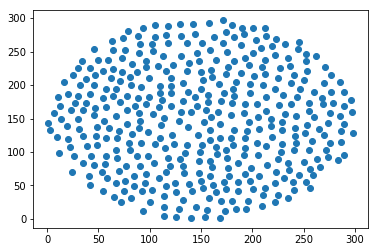

In [10]:
sample=poisson_disc_samples(300, 300, 10, k=10, distance=euclidean_distance, random=random)
sample=np.array(sample)

index= scipy.spatial.distance.cdist([[150,150]], sample, metric='euclidean')<150

kreis= sample[index[0]]
plt.scatter(kreis[:,0], kreis[:,1])

abstände= scipy.spatial.distance.cdist(sample, sample, metric='euclidean')

ohne_0= abstände[abstände>0]
print(min(ohne_0))

radius = (np.sqrt(number_atoms*r_b**2/density))
density = (len(kreis)*5**2/150**2)
print(density)
print(len(kreis))



#maximal random packing